In [1]:
import torch
from torch import nn
from g2fl import dl as dl

In [2]:
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本

In [3]:
x_train

tensor([0.0523, 0.0872, 0.2659, 0.7461, 0.9414, 1.0065, 1.1049, 1.1798, 1.1888,
        1.2494, 1.2510, 1.3397, 1.3765, 1.4971, 1.6574, 1.6749, 1.7463, 1.7846,
        1.8205, 1.8567, 1.9462, 2.0695, 2.1888, 2.2467, 2.2609, 2.2874, 2.3198,
        2.3313, 2.4378, 2.6637, 2.6784, 2.6912, 2.9994, 3.3932, 3.6338, 3.6597,
        3.6832, 3.8182, 3.8510, 3.9105, 4.0014, 4.0562, 4.1290, 4.1687, 4.3514,
        4.3615, 4.5546, 4.8601, 4.9207, 4.9440])

In [4]:
def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

In [5]:
def plot_kernel_reg(y_hat):
    dl.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    dl.plt.plot(x_train, y_train, 'o', alpha=0.5);

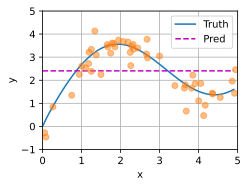

In [6]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

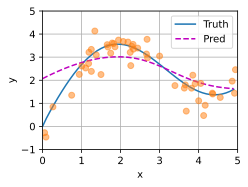

In [7]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

In [8]:
def show_heatmaps(
    matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap="Reds"
):
    """Show heatmaps of matrices.

    Defined in :numref:`sec_queries-keys-values`"""
    dl.use_svg_display()
    num_rows, num_cols, _, _ = matrices.shape
   
    fig, axes = dl.plt.subplots(
        num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False
    )
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            print("sf",matrix.shape)
            pcm = ax.imshow(matrix.numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

sf torch.Size([50, 50])


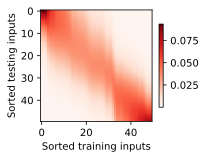

In [9]:
show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

In [10]:
attention_weights

tensor([[9.3310e-02, 9.3083e-02, 9.0193e-02,  ..., 6.9389e-07, 5.1596e-07,
         4.6008e-07],
        [8.4529e-02, 8.4618e-02, 8.3469e-02,  ..., 1.0166e-06, 7.6054e-07,
         6.7976e-07],
        [7.6232e-02, 7.6579e-02, 7.6901e-02,  ..., 1.4829e-06, 1.1161e-06,
         9.9984e-07],
        ...,
        [1.3984e-06, 1.6436e-06, 3.6881e-06,  ..., 6.7711e-02, 6.6934e-02,
         6.6574e-02],
        [9.3218e-07, 1.0995e-06, 2.5117e-06,  ..., 7.3003e-02, 7.2605e-02,
         7.2382e-02],
        [6.1897e-07, 7.3259e-07, 1.7037e-06,  ..., 7.8399e-02, 7.8445e-02,
         7.8386e-02]])

In [11]:
attention_weights.unsqueeze(0).unsqueeze(0).shape

torch.Size([1, 1, 50, 50])

In [12]:
a = torch.normal(0,1,(2,3))

In [13]:
a

tensor([[-0.5678, -0.3865,  0.6974],
        [-0.1000, -0.1706,  0.8865]])

In [14]:
a.unsqueeze(0).unsqueeze(0)

tensor([[[[-0.5678, -0.3865,  0.6974],
          [-0.1000, -0.1706,  0.8865]]]])

In [15]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
torch.bmm(X, Y).shape

torch.Size([2, 1, 6])

In [16]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

tensor([[[ 4.5000]],

        [[14.5000]]])

In [17]:
weights

tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000]])

In [18]:
weights.unsqueeze(1)

tensor([[[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]],

        [[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
          0.1000, 0.1000]]])

In [19]:
weights.unsqueeze(1).shape

torch.Size([2, 1, 10])

In [20]:
values

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]])

In [21]:
values.unsqueeze(-1)

tensor([[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.]],

        [[10.],
         [11.],
         [12.],
         [13.],
         [14.],
         [15.],
         [16.],
         [17.],
         [18.],
         [19.]]])

In [46]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))

    def forward(self, queries, keys, values):
        # queries和attention_weights的形状为(查询个数，“键－值”对个数)
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
        print("sf",queries.shape)
        self.attention_weights = nn.functional.softmax(
            -((queries - keys) * self.w)**2 / 2, dim=1)
        # values的形状为(查询个数，“键－值”对个数)
        return torch.bmm(self.attention_weights.unsqueeze(1),
                         values.unsqueeze(-1)).reshape(-1)

In [47]:
# X_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输入
X_tile = x_train.repeat((n_train, 1))
# Y_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输出
Y_tile = y_train.repeat((n_train, 1))
# keys的形状:('n_train'，'n_train'-1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
# values的形状:('n_train'，'n_train'-1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

In [49]:
y_train.shape

torch.Size([50])

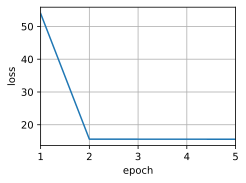

In [48]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = dl.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train)
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

In [45]:
net.attention_weights.shape

torch.Size([50, 50])

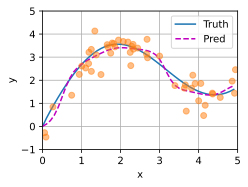

In [44]:
# keys的形状:(n_test，n_train)，每一行包含着相同的训练输入（例如，相同的键）
keys = x_train.repeat((n_test, 1))
# value的形状:(n_test，n_train)
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

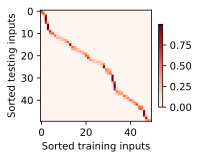

In [26]:
dl.show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

In [50]:
net.attention_weights.shape

torch.Size([50, 49])